In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, roc_curve, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Desktop/adult/adult.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.shape


(48842, 15)

In [5]:
df.dtypes


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.duplicated().sum()


52

In [8]:
df = df.drop_duplicates()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.nunique()


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
df['workclass'].value_counts()


Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
df['occupation'].value_counts()


Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [14]:
df['native-country'].value_counts()


United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [17]:
df.drop(df[df['native-country'] == '?'].index, inplace=True)

In [18]:
df['native-country'].value_counts()


United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [19]:
df['income'].value_counts()


<=50K    36473
>50K     11461
Name: income, dtype: int64

In [20]:
# education
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
df.education = df.education.replace('HS-grad','High School')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Higher-Education')
df.education = df.education.replace('Bachelors','Under-Grad')
df.education = df.education.replace('Masters','Graduation')
df.education = df.education.replace('Doctorate','Doc')

In [21]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,High School,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Higher-Education,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Higher-Education,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Higher-Education,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [22]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})


<Axes: xlabel='age'>

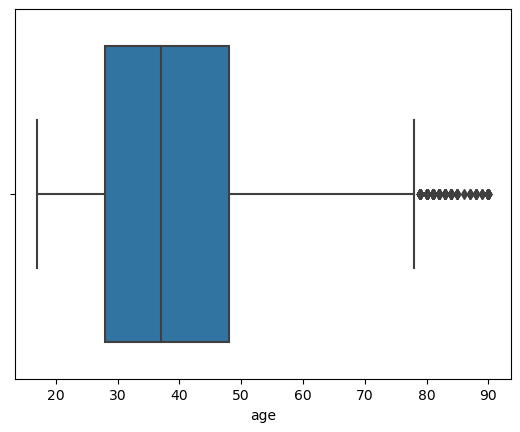

In [23]:
sns.boxplot(data=df,x='age')


In [26]:
def ret_outliers(df):
    q1 = df.quantile(0.25)
    q3 =df.quantile(0.75)
    
    iqr = (q3-q1)
    
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    
    outliers=[]
    
    for i in df:
        if i<lower or i>upper:
            outliers.append(i)
    return outliers

In [27]:
olr = ret_outliers(df['age'])

In [28]:
len(olr)


210

In [29]:
max(olr)


90

In [30]:
min(olr)


79

In [31]:
# the feature age has 193 outliers with max value of 90 and min value of 79
# for working class people generally the age is between 18 to 65, in this we will remove upper limit outliers i.e age>79

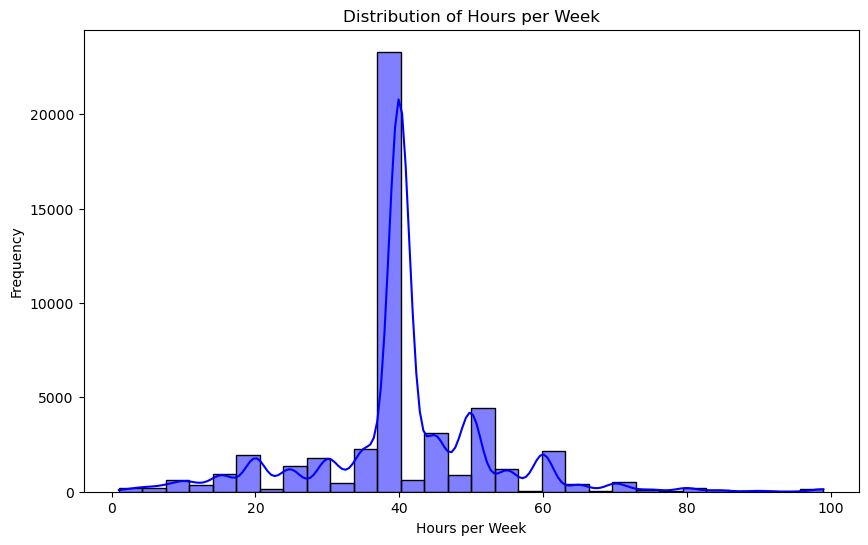

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30, color='#0000FF')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

In [33]:
df.drop(df[df['age']>79].index,inplace=True)

In [34]:
df.shape

(47754, 15)

In [35]:
# checking for correlation
numeric_df = df.select_dtypes(include=['int64'])
print(numeric_df)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  income  
0                  40       0  
1                  50       0  
2                  40       1  
3                  40       1  
4                  30       0  
...

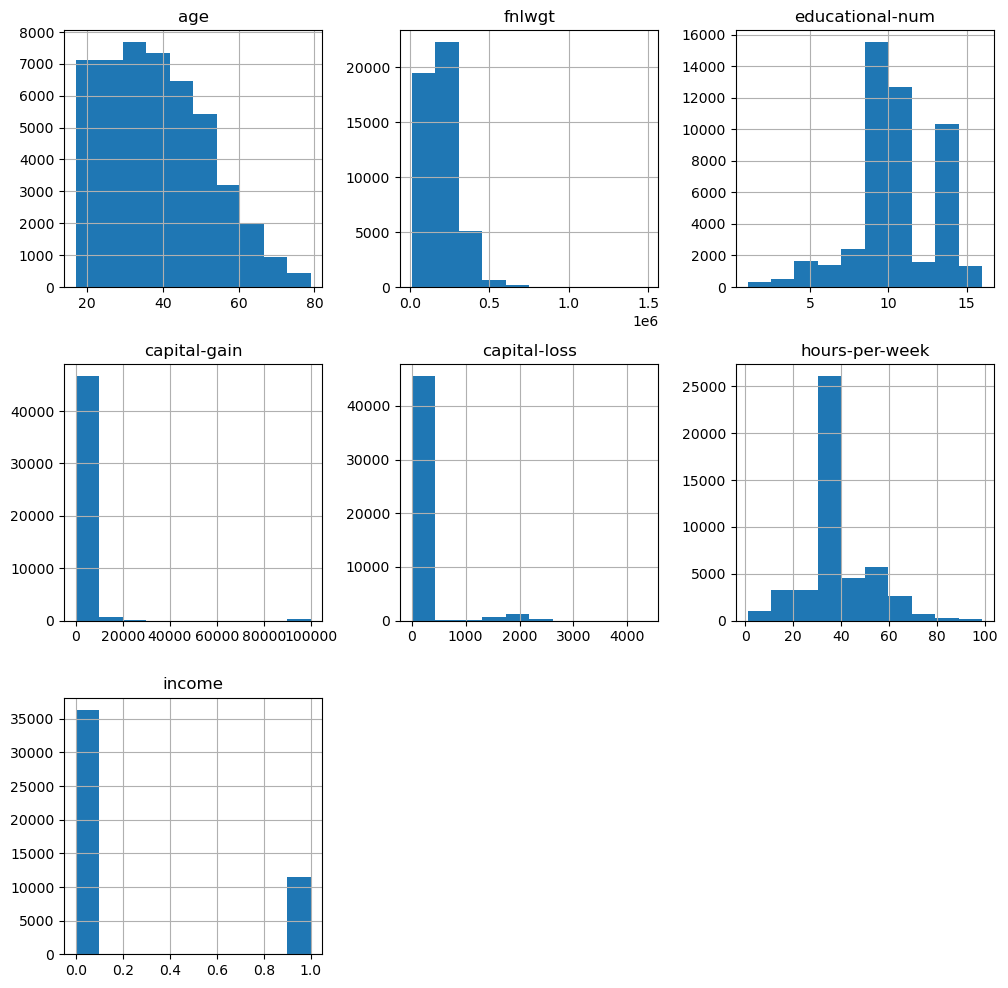

In [36]:
numeric_df.hist(figsize=(12,12),layout=(3,3),sharex=False);


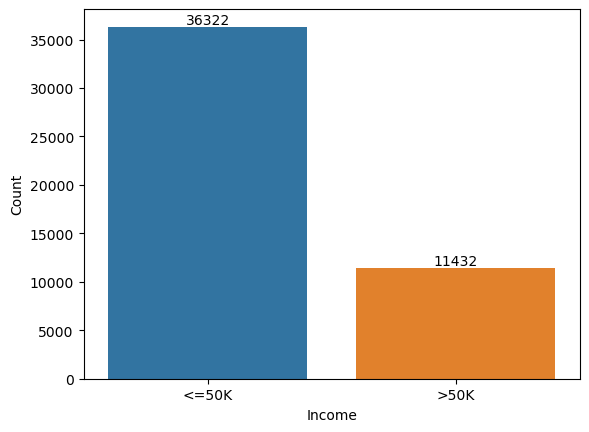

In [37]:
# EDA

ax = sns.countplot(data=df, x='income');
ax.set_xticklabels(['<=50K', '>50K']);
ax.set_xlabel('Income');
ax.set_ylabel('Count');
ax.bar_label(ax.containers[0]);

Text(0.5, 1.0, 'Histogram')

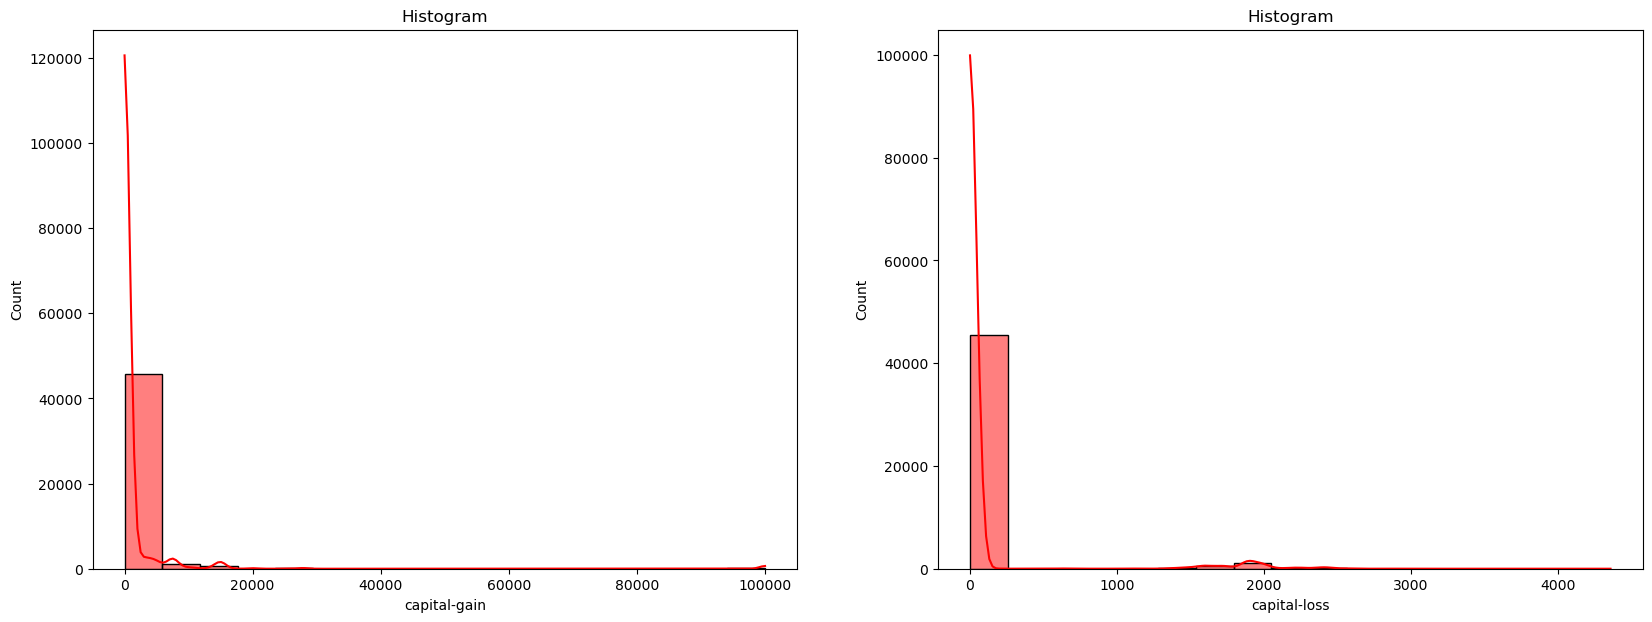

In [38]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

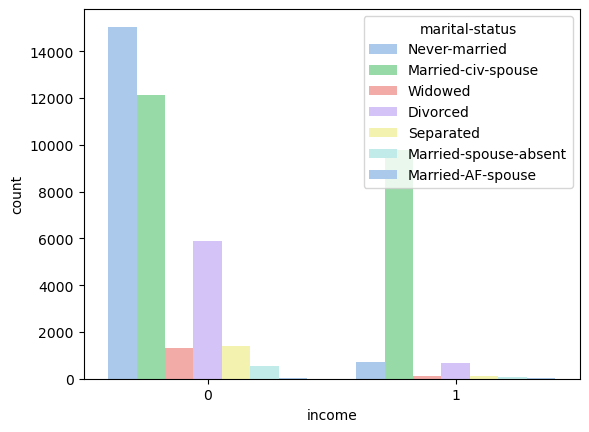

In [39]:
sns.countplot(x=df['income'],palette='pastel6',hue='marital-status',data=df);


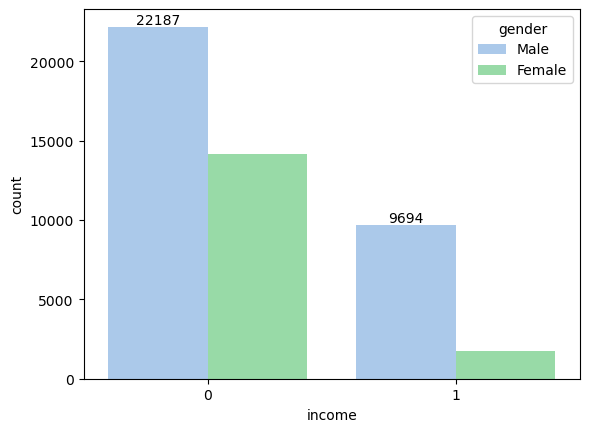

In [40]:
ax = sns.countplot(x=df['income'],palette='pastel6',hue='gender',data=df);
ax.bar_label(ax.containers[0]);

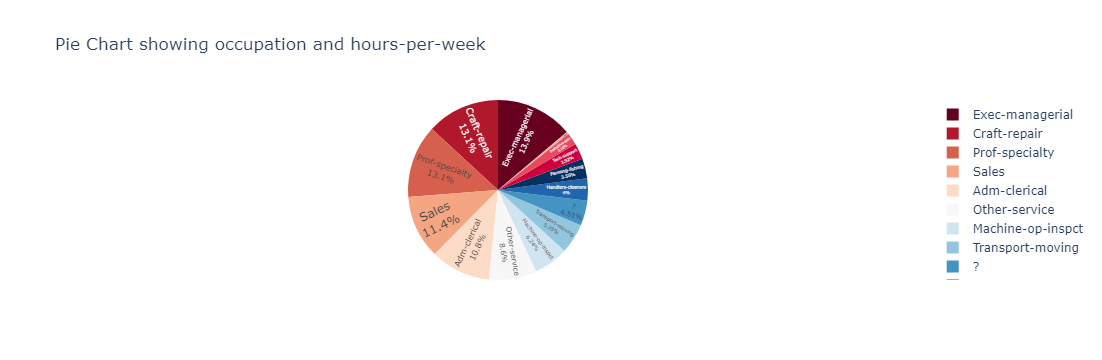

In [42]:
fig = px.pie(df,values='hours-per-week',names='occupation',color_discrete_sequence=px.colors.sequential.RdBu,title
            ='Pie Chart showing occupation and hours-per-week')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

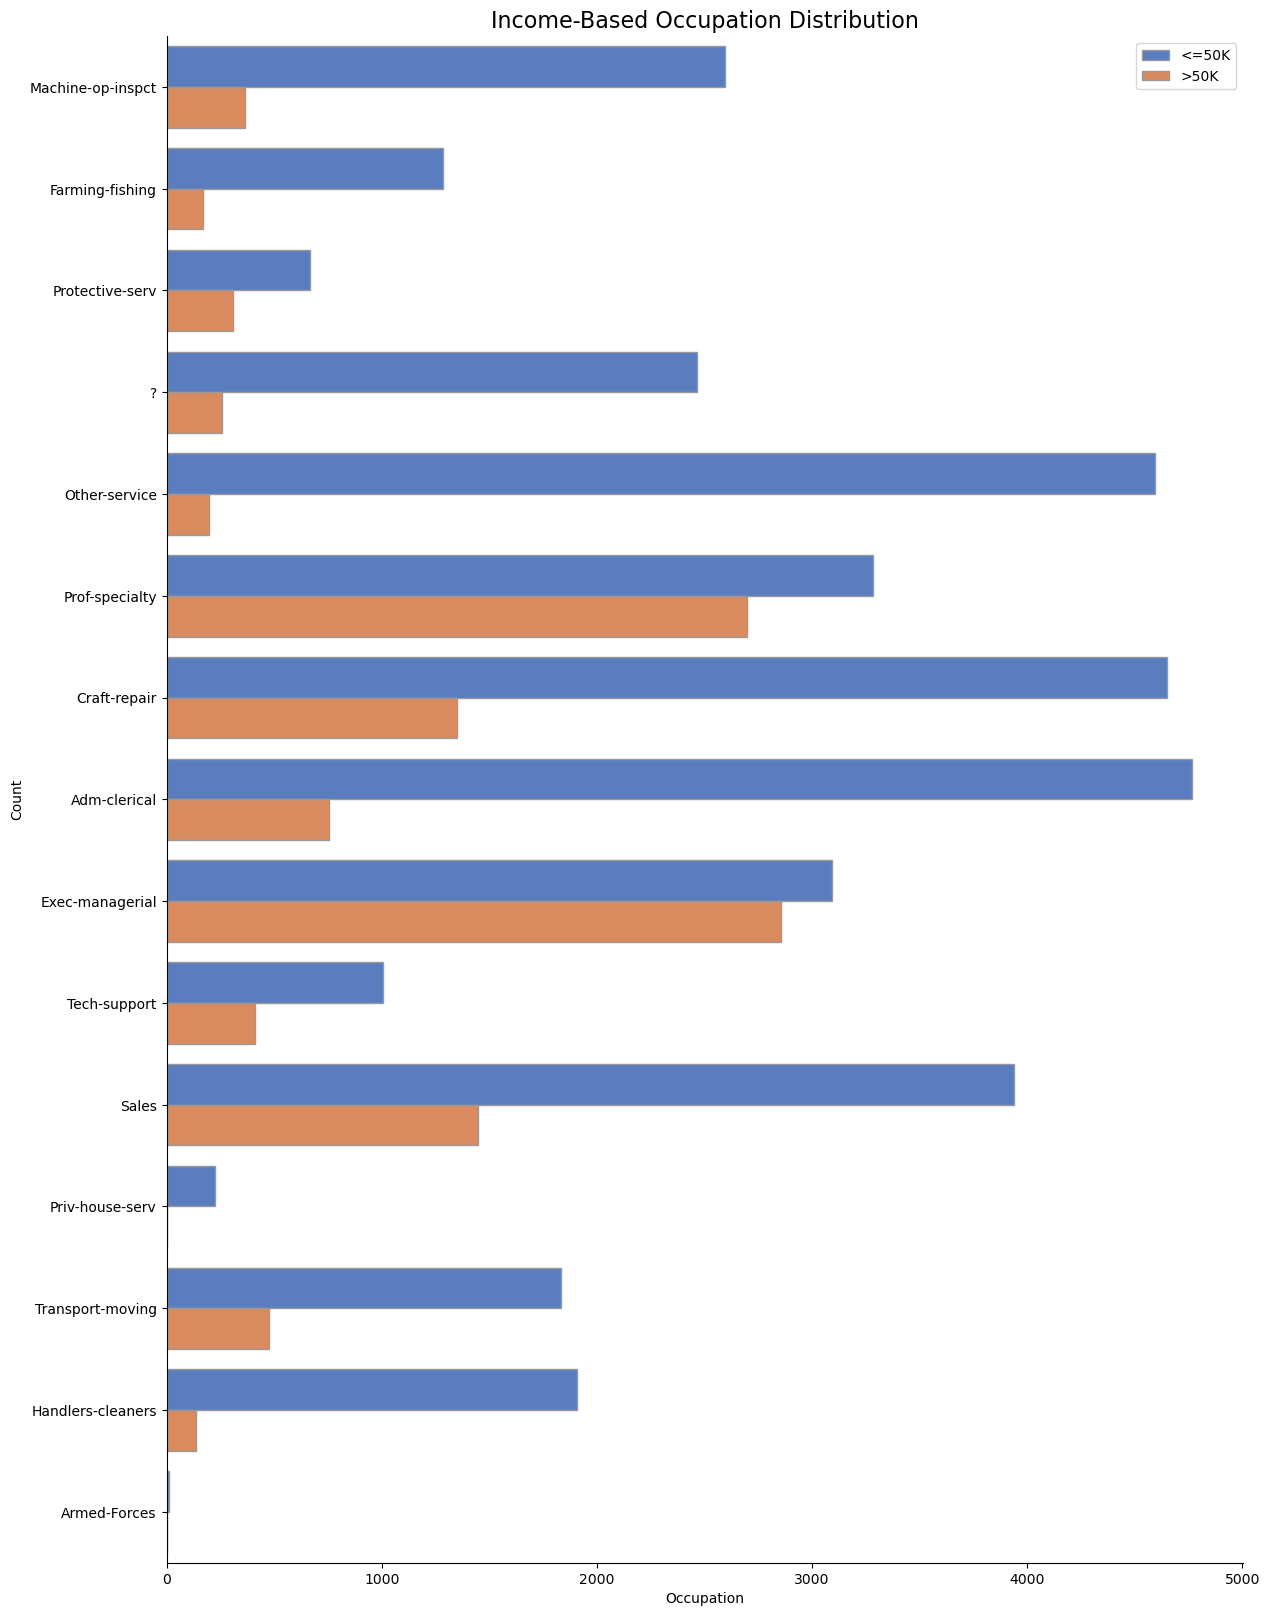

In [43]:
# Occupation -> Income Dependency
plot = sns.catplot(data=df, y='occupation', hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=16, aspect=.8, orient='v');
plot.set_xlabels('Occupation');
plot.set_ylabels('Count');
plt.legend(loc='upper right', labels=['<=50K', '>50K']);
plt.title('Income-Based Occupation Distribution', fontsize=16);

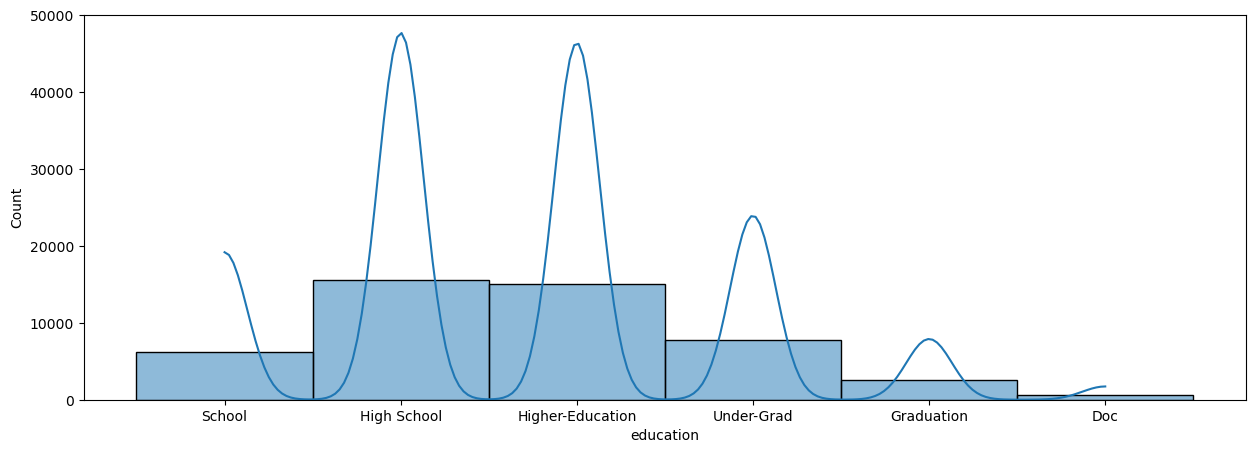

In [50]:
plt.figure(figsize = (15,5))
sns.histplot(data=df['education'],bins=50, kde=True);

In [ ]:
sns.heatmap(df.corr()[['income']].sort_values(by='OUTCOME', ascending=False), annot = True)